In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta
import numpy as np


In [2]:
# Load list of dictionaries
with open("data/uptime_telemetry", "r") as f:
    a=json.load(f)

In [3]:
# Convert list of dictionaries to dataframe
uptime_df=pd.DataFrame.from_dict(a)

In [4]:
# Read data from csv
position_df=pd.read_csv("data/position_telemetry")

In [5]:
uptime_df.head()

,obc_received_timestamp,uptime
0,1649393052581,0.0
1,1649393062746,0.0
2,1649393072686,0.0
3,1649393082416,0.0
4,1649393092608,0.0


In [6]:
position_df.head()

,epoch,position_teme_km_x,position_teme_km_y,position_teme_km_z
0,2022-04-08 04:23:34+00:00,-3762.787201,1659.783861,5542.323345
1,2022-04-08 04:23:44+00:00,-3701.366216,1650.890358,5586.171051
2,2022-04-08 04:23:54+00:00,-3639.497837,1641.797305,5629.341661
3,2022-04-08 04:24:04+00:00,-3577.189573,1632.505816,5671.829991
4,2022-04-08 04:24:14+00:00,-3514.448987,1623.017030,5713.630940


In [7]:
uptime_df.describe()

,obc_received_timestamp,uptime
count,4.095500e+04,40908.000000
mean,1.650698e+12,142.146951
std,7.461088e+08,144.896225
min,1.649393e+12,-1.000000
25%,1.650047e+12,0.000000
50%,1.650713e+12,100.097582
75%,1.651338e+12,267.928093
max,1.651986e+12,434.000000


In [8]:
uptime_df.shape

(40955, 2)

In [9]:
position_df.describe()

,position_teme_km_x,position_teme_km_y,position_teme_km_z
count,259201.000000,259201.000000,259201.000000
mean,-0.393081,0.271389,-0.270656
std,4759.904379,941.116968,4770.815777
min,-6908.438359,-2081.450259,-6849.347933
25%,-4712.319227,-824.230991,-4728.627773
50%,0.000000,0.000000,0.000000
75%,4711.192501,824.904404,4727.199181
max,6909.323202,2080.797718,6846.775883


In [10]:
position_df.shape

(259201, 4)

In [11]:
uptime_df.columns

Index(['obc_received_timestamp', 'uptime'], dtype='object')

In [12]:
uptime_df.head()

,obc_received_timestamp,uptime
0,1649393052581,0.0
1,1649393062746,0.0
2,1649393072686,0.0
3,1649393082416,0.0
4,1649393092608,0.0


<Axes: >

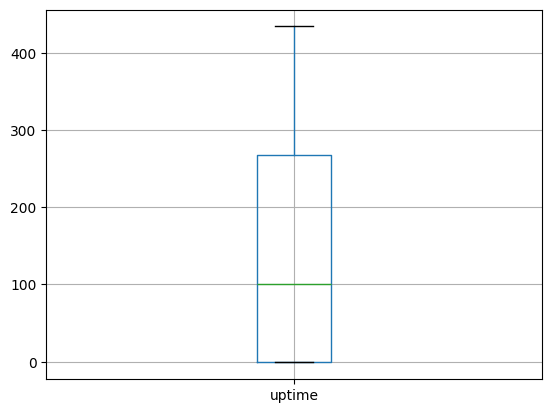

In [13]:
uptime_df.boxplot(column=['uptime'])  

In [14]:
len(str(uptime_df.obc_received_timestamp[0]))

13

In [15]:
# Example Unix timestamp
unix_timestamp_ms = 1649393052581  
unix_timestamp_s = unix_timestamp_ms / 1000.0  # Corresponds to '2022-08-07 15:00:00 UTC'

# Convert Unix timestamp to datetime in UTC
utc_datetime = datetime.fromtimestamp(unix_timestamp_s,timezone.utc)
print("UTC datetime:", utc_datetime)

UTC datetime: 2022-04-08 04:44:12.581000+00:00


In [16]:
uptime_df["timestamp"]=uptime_df['obc_received_timestamp'].apply(lambda x: (datetime.fromtimestamp(x/1000.0,timezone.utc)))


In [17]:
unix_ts=list(uptime_df.obc_received_timestamp)
timestamp=list(uptime_df.timestamp)
uptime=list(uptime_df.uptime)
m=1000

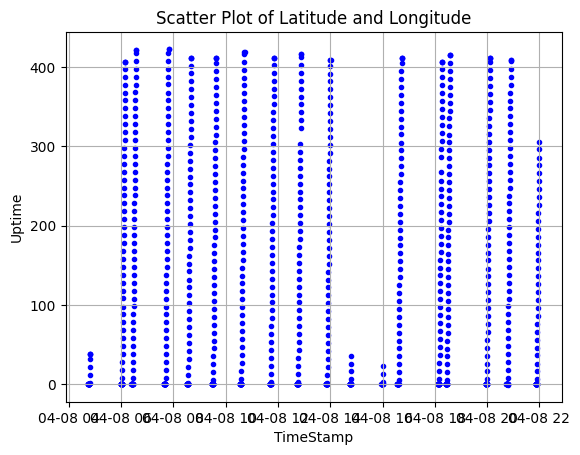

In [18]:
# Create the scatter plot
plt.figure()
plt.scatter(timestamp[0:m],uptime[0:m], c='blue',marker='.')#marker='o'

# Add titles and labels
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('TimeStamp')
plt.ylabel('Uptime')

# Optionally add grid
plt.grid(True)

# Show the plot
plt.show()

In [19]:
uptime_df.columns

Index(['obc_received_timestamp', 'uptime', 'timestamp'], dtype='object')

In [20]:
uptime_df.sort_values(by='timestamp', ascending=True,inplace=True)

In [21]:
uptime_df.head()

,obc_received_timestamp,uptime,timestamp
0,1649393052581,0.0,2022-04-08 04:44:12.581000+00:00
1,1649393062746,0.0,2022-04-08 04:44:22.746000+00:00
2,1649393072686,0.0,2022-04-08 04:44:32.686000+00:00
3,1649393082416,0.0,2022-04-08 04:44:42.416000+00:00
4,1649393092608,0.0,2022-04-08 04:44:52.608000+00:00


In [22]:
# Order columns again for simplifying things in the future
uptime_df=uptime_df.iloc[:,[2,0,1]]

### Data consinstency check: null values and negative values

I will not discard null values as a first step because these might be related with the obc anomaly.
The timestamp of the null values might contribute to understand the problem.

In [23]:
uptime_df.isnull().value_counts()

timestamp  obc_received_timestamp  uptime
False      False                   False     40908
                                   True         47
Name: count, dtype: int64

In [24]:
uptime_df.isna().value_counts()

timestamp  obc_received_timestamp  uptime
False      False                   False     40908
                                   True         47
Name: count, dtype: int64

In [25]:
null_mask = uptime_df.isnull().any(axis=1)
null_rows = uptime_df[null_mask]

In [26]:
null_rows.head()

,timestamp,obc_received_timestamp,uptime
516,2022-04-08 12:51:32.472000+00:00,1649422292472,NaN
745,2022-04-08 18:14:52.031000+00:00,1649441692031,NaN
1910,2022-04-09 13:20:08.923000+00:00,1649510408923,NaN
3191,2022-04-10 14:57:44.463000+00:00,1649602664463,NaN
3584,2022-04-10 20:33:32.356000+00:00,1649622812356,NaN


In [27]:
(uptime_df['uptime'] < 0).value_counts()

uptime
False    40866
True        89
Name: count, dtype: int64

In [28]:
negative_values_mask=uptime_df['uptime'] < 0

In [29]:
negative_values = uptime_df[negative_values_mask]

In [30]:
negative_values

,timestamp,obc_received_timestamp,uptime
905,2022-04-08 20:47:13.316000+00:00,1649450833316,-1.0
1020,2022-04-08 22:31:41.144000+00:00,1649457101144,-1.0
1832,2022-04-09 11:51:04.600000+00:00,1649505064600,-1.0
2290,2022-04-09 21:21:10.844000+00:00,1649539270844,-1.0
2429,2022-04-10 00:06:27.975000+00:00,1649549187975,-1.0
...,...,...,...
39006,2022-05-06 18:08:21.771000+00:00,1651860501771,-1.0
40042,2022-05-07 12:53:12.303000+00:00,1651927992303,-1.0
40475,2022-05-07 20:41:08.817000+00:00,1651956068817,-1.0
40601,2022-05-07 23:11:09.618000+00:00,1651965069618,-1.0


### Window

In [31]:
# I will drop null values now
uptime_df.shape


(40955, 3)

In [32]:
uptime_df.dropna(inplace=True)

In [33]:
uptime_df.shape

(40908, 3)

In [34]:
# I will drop -1 values now
# After inspecting the data, it seems that this -1 value is a wrong sampled value
# in most of the cases the state is not changing in that moment.
# This means, that if the obc is booting the next row corresponds to a booting row and
# if the obc is active the next row corresponds to an active row

uptime_df.drop(uptime_df[uptime_df['uptime'] == -1].index, inplace = True)

In [35]:
uptime_df.shape

(40819, 3)

In [36]:
# Reset index
uptime_df.reset_index(drop=True,inplace=True)

In [37]:
# number of rows to shift
w=1

In [38]:
# Check if the uptime value is equal to the previous row and if it is zero uptime
uptime_df['same_as_last_value_and_value_is_zero'] =  (uptime_df['uptime'] == uptime_df['uptime'].shift(w)) & (uptime_df['uptime'] == 0)


In [39]:
uptime_df['same_as_last_value_and_value_is_zero'].value_counts()

same_as_last_value_and_value_is_zero
False    27946
True     12873
Name: count, dtype: int64

In [40]:
booting_mask=uptime_df['same_as_last_value_and_value_is_zero']

In [41]:
uptime_df

,timestamp,obc_received_timestamp,uptime,same_as_last_value_and_value_is_zero
0,2022-04-08 04:44:12.581000+00:00,1649393052581,0.000000,False
1,2022-04-08 04:44:22.746000+00:00,1649393062746,0.000000,True
2,2022-04-08 04:44:32.686000+00:00,1649393072686,0.000000,True
3,2022-04-08 04:44:42.416000+00:00,1649393082416,0.000000,True
4,2022-04-08 04:44:52.608000+00:00,1649393092608,0.000000,True
...,...,...,...,...
40814,2022-05-08 04:51:10.063000+00:00,1651985470063,194.108080,False
40815,2022-05-08 04:51:19.689000+00:00,1651985479689,203.734508,False
40816,2022-05-08 04:51:29.848000+00:00,1651985489848,213.893375,False
40817,2022-05-08 04:51:39.906000+00:00,1651985499906,223.951156,False


In [42]:
# Cooldown 
# same as last value BUT not zero value
uptime_df['same_as_last_value_and_value_is_not_zero'] =  (uptime_df['uptime'] == uptime_df['uptime'].shift(w)) & (uptime_df['uptime'] != 0)


In [43]:
cooldown_mask=uptime_df['same_as_last_value_and_value_is_not_zero']

In [44]:
#uptime_df['is_booting_time'] =  uptime_df['same_as_last_value_and_value_is_zero'] == True


In [45]:
uptime_df.head()

,timestamp,obc_received_timestamp,uptime,same_as_last_value_and_value_is_zero,same_as_last_value_and_value_is_not_zero
0,2022-04-08 04:44:12.581000+00:00,1649393052581,0.0,False,False
1,2022-04-08 04:44:22.746000+00:00,1649393062746,0.0,True,False
2,2022-04-08 04:44:32.686000+00:00,1649393072686,0.0,True,False
3,2022-04-08 04:44:42.416000+00:00,1649393082416,0.0,True,False
4,2022-04-08 04:44:52.608000+00:00,1649393092608,0.0,True,False


In [46]:
# List of conditions
conditions = [
        (booting_mask == True) ,
        (booting_mask == False) & (cooldown_mask == False),
        (cooldown_mask == True)
]
# List of values to return
choices  = [
       "booting",
       "active",
       "cooldown"
]
# create a new column in the DF based on the conditions
uptime_df["status"] = np.select(conditions, choices, "ERROR")

In [47]:
# List of conditions
conditions = [
        (uptime_df["status"] == "active") & (uptime_df["uptime"] == 0),
        (uptime_df["status"] == "booting"),
        (uptime_df["status"] == "active") & (uptime_df["uptime"] != 0),
        (uptime_df["status"] == "cooldown")
]
# List of values to return
choices  = [
       "start_boot",
       "booting",
       "active",
       "cooldown"
]
# create a new column in the DF based on the conditions
uptime_df["state"] = np.select(conditions, choices, "ERROR")

In [48]:
#((booting_mask == False) & (cooldown_mask == False) & uptime_df["uptime"]==0)

In [49]:
uptime_df.columns

Index(['timestamp', 'obc_received_timestamp', 'uptime',
       'same_as_last_value_and_value_is_zero',
       'same_as_last_value_and_value_is_not_zero', 'status', 'state'],
      dtype='object')

In [50]:
uptime_df.drop(['same_as_last_value_and_value_is_zero', 'same_as_last_value_and_value_is_not_zero',"status"], axis=1,inplace=True)

In [51]:
uptime_df.state.value_counts()

state
active        26165
booting       12873
cooldown       1064
start_boot      717
Name: count, dtype: int64

In [52]:
""" {
    id: idnum,
    start: timestamp
    booting_time: seconds
    active_time: seconds
    cooldown_time: seconds

}
 """

' {\n    id: idnum,\n    start: timestamp\n    booting_time: seconds\n    active_time: seconds\n    cooldown_time: seconds\n\n}\n '

In [53]:
uptime_df.columns

Index(['timestamp', 'obc_received_timestamp', 'uptime', 'state'], dtype='object')

In [54]:
rows=uptime_df.shape[0]

In [55]:
#uptime_df.reset_index(drop=True,inplace=True)

In [56]:
#rows=517

In [57]:
uptime_df.state.value_counts()

state
active        26165
booting       12873
cooldown       1064
start_boot      717
Name: count, dtype: int64

In [58]:
lista=[]
w=0
iteration_for_new_event = True

for i in range(rows-1):
    if uptime_df["state"][i] == "start_boot":

        # Save window id
        id_window=w
        # Increase one the counter for next window
        w+=1
        #
        boot_start_ts = uptime_df["obc_received_timestamp"][i]   # unixtimestamp in mili seconds
        boot_start_dt = uptime_df["timestamp"][i]                 # datetime

    if uptime_df["state"][i] == "booting":
        
        boot_t_minus_1_ts = uptime_df["obc_received_timestamp"][i-1]
        boot_t_minus_1_dt = uptime_df["timestamp"][i-1]
        boot_current_ts = uptime_df["obc_received_timestamp"][i]   # unixtimestamp in mili seconds
        boot_current_dt = uptime_df["timestamp"][i]                 # datetime
        
        time_passed=(boot_current_ts - boot_start_ts)/1000         # time in seconds since the boot sequence started
        
        # Check if the boot sequence have not failed, avg time 180 seconds
        # 600 seconds > 180 seconds 
        if time_passed > 600:

            # Save info for failed window
            iter_dict={
            "id": id_window,
            "boot_start_dt": boot_start_dt,
            "booting_time": (boot_t_minus_1_ts - boot_start_ts)/1000.0, 
            "active_time": "failed",
            "cooldown_time": "failed",
            "total_duration": (boot_t_minus_1_ts-boot_start_ts)/1000,
            "window_end_dt": boot_t_minus_1_dt
            }
            lista.append(iter_dict)

            # Status correction to cotinue de algorithm
            uptime_df["state"][i] = "start_boot"
            # Save window id
            id_window=w
            # Increase one the counter for next window
            w+=1
            #
            boot_start_ts = uptime_df["obc_received_timestamp"][i]   # unixtimestamp in mili seconds
            boot_start_dt = uptime_df["timestamp"][i]                 # datetime

        else:
            booting_flag = 0

    if uptime_df["state"][i]  ==  "active" and booting_flag==0:
        # First active sample, save previous sample to get booting time
        boot_finish_ts = uptime_df["obc_received_timestamp"][i-1]    # unixtimestamp in mili seconds
        boot_finish_dt = uptime_df["timestamp"][i-1]                 # datetime
        booting_flag = 1

        # Do nothing until next status change

    # Check if the active window is finishing    
    if uptime_df["state"][i]  ==  "active" and (uptime_df["state"][i+1] == "cooldown" or uptime_df["state"][i+1] == "start_boot"):
        turn_off_ts = uptime_df["obc_received_timestamp"][i]    # unixtimestamp in mili seconds
        turn_off_dt = uptime_df["timestamp"][i]                 # datetime

    # Cooldown
    if uptime_df["state"][i]  ==  "cooldown" and uptime_df["state"][i+1] != "cooldown":
        cooldown_end_ts = uptime_df["obc_received_timestamp"][i]    # unixtimestamp in mili seconds
        cooldown_end_dt = uptime_df["timestamp"][i]                 # datetime
        # Save data for this event
        # Create dictionary
        iter_dict={
            "id": id_window,
            "boot_start_dt": boot_start_dt,
            "booting_time": (boot_finish_ts - boot_start_ts)/1000.0, 
            "active_time": (turn_off_ts - boot_finish_ts)/1000.0,
            "cooldown_time": (cooldown_end_ts - turn_off_ts)/1000.0,
            "total_duration": (cooldown_end_ts-boot_start_ts)/1000,
            "window_end_dt": cooldown_end_dt

        }
        lista.append(iter_dict)


/tmp/ipykernel_33981/559347590.py:42: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  uptime_df["state"][i] = "start_boot"
/tmp/ipykernel_33981/559347590.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [59]:
lista

[{'id': 0,
  'boot_start_dt': Timestamp('2022-04-08 04:44:12.581000+0000', tz='UTC'),
  'booting_time': 169.994,
  'active_time': 50.016,
  'cooldown_time': 19.932,
  'total_duration': 239.942,
  'window_end_dt': Timestamp('2022-04-08 04:48:12.523000+0000', tz='UTC')},
 {'id': 1,
  'boot_start_dt': Timestamp('2022-04-08 05:59:13.201000+0000', tz='UTC'),
  'booting_time': 190.177,
  'active_time': 409.878,
  'cooldown_time': 20.312,
  'total_duration': 620.367,
  'window_end_dt': Timestamp('2022-04-08 06:09:33.568000+0000', tz='UTC')},
 {'id': 2,
  'boot_start_dt': Timestamp('2022-04-08 06:23:34.131000+0000', tz='UTC'),
  'booting_time': 180.251,
  'active_time': 430.202,
  'cooldown_time': 9.868,
  'total_duration': 620.321,
  'window_end_dt': Timestamp('2022-04-08 06:33:54.452000+0000', tz='UTC')},
 {'id': 3,
  'boot_start_dt': Timestamp('2022-04-08 07:38:31.795000+0000', tz='UTC'),
  'booting_time': 180.05,
  'active_time': 430.016,
  'cooldown_time': 9.972,
  'total_duration': 620.0

In [60]:
df=pd.DataFrame.from_dict(lista)

In [61]:
failed_boots_mask=df["active_time"]=="failed"

In [62]:
exclude_failed_boots_mask=df["active_time"]!="failed"

In [63]:
failed_boots=df[failed_boots_mask]

In [64]:
failed_boots

,id,boot_start_dt,booting_time,active_time,cooldown_time,total_duration,window_end_dt
32,35,2022-04-09 15:39:11.042000+00:00,170.161,failed,failed,170.161,2022-04-09 15:42:01.203000+00:00
40,44,2022-04-10 00:28:40.617000+00:00,189.893,failed,failed,189.893,2022-04-10 00:31:50.510000+00:00
505,547,2022-04-30 23:39:24.382000+00:00,169.829,failed,failed,169.829,2022-04-30 23:42:14.211000+00:00
570,620,2022-05-04 00:30:49.748000+00:00,190.034,failed,failed,190.034,2022-05-04 00:33:59.782000+00:00


In [65]:
df=df[exclude_failed_boots_mask]

In [66]:
df.head()

,id,boot_start_dt,booting_time,active_time,cooldown_time,total_duration,window_end_dt
0,0,2022-04-08 04:44:12.581000+00:00,169.994,50.016,19.932,239.942,2022-04-08 04:48:12.523000+00:00
1,1,2022-04-08 05:59:13.201000+00:00,190.177,409.878,20.312,620.367,2022-04-08 06:09:33.568000+00:00
2,2,2022-04-08 06:23:34.131000+00:00,180.251,430.202,9.868,620.321,2022-04-08 06:33:54.452000+00:00
3,3,2022-04-08 07:38:31.795000+00:00,180.050,430.016,9.972,620.038,2022-04-08 07:48:51.833000+00:00
4,4,2022-04-08 08:30:49.805000+00:00,179.999,420.086,20.048,620.133,2022-04-08 08:41:09.938000+00:00


In [67]:
df.describe()

,id,booting_time,total_duration
count,658.000000,658.000000,658.000000
mean,357.633739,179.153123,580.692588
std,207.442793,7.553658,115.744616
min,0.000000,169.489000,239.708000
25%,176.250000,170.114750,619.860250
50%,359.000000,179.970000,619.991000
75%,536.750000,180.305750,620.099000
max,719.000000,190.334000,620.398000


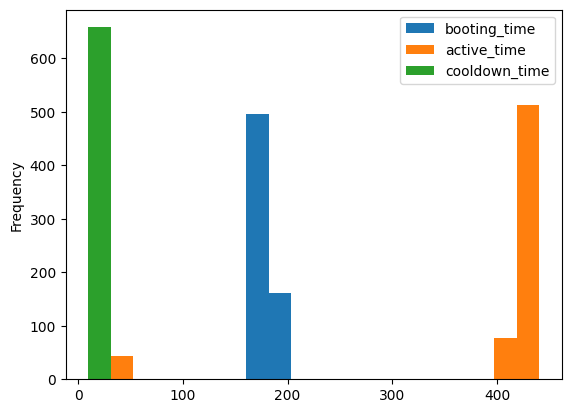

In [68]:
df.plot.hist(column=["booting_time","active_time","cooldown_time"],bins=20)
plt.show()



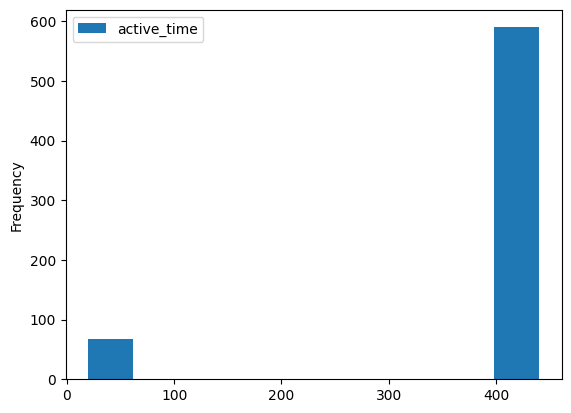

In [69]:
df.plot.hist(column="active_time")
plt.show()

Based on the histogram, we can think that the IMAGING windows with duration less than 100 seconds are the MAINTENANCE ones.

In [70]:
imaging_df=df[df["active_time"]>100]

In [71]:
imaging_df.describe()

,id,booting_time,total_duration
count,590.000000,590.000000,590.000000
mean,362.777966,179.338829,619.956302
std,207.102748,7.487853,0.722236
min,1.000000,169.489000,609.884000
25%,180.250000,170.126250,619.897250
50%,370.500000,179.970000,620.011500
75%,539.750000,180.383750,620.110500
max,719.000000,190.334000,620.398000


In [72]:
maintenance_df=df[df["active_time"]<100]

In [73]:
maintenance_df.describe()

,id,booting_time,total_duration
count,68.000000,68.000000,68.000000
mean,313.000000,177.541853,240.022132
std,206.540734,7.979483,0.144570
min,0.000000,169.767000,239.708000
25%,153.250000,170.036500,239.916000
50%,278.500000,179.918000,240.036500
75%,449.750000,180.221250,240.133500
max,701.000000,190.188000,240.316000


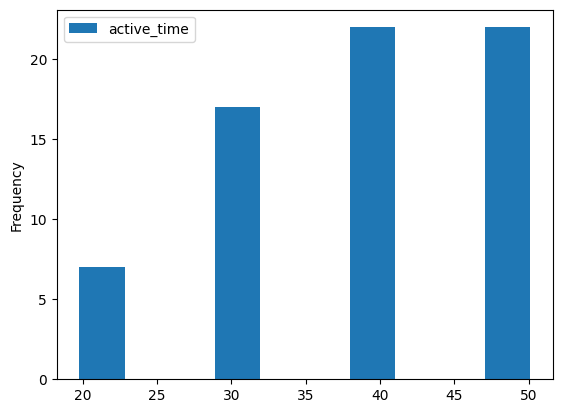

In [74]:
maintenance_df.plot.hist(column="active_time")
plt.show()

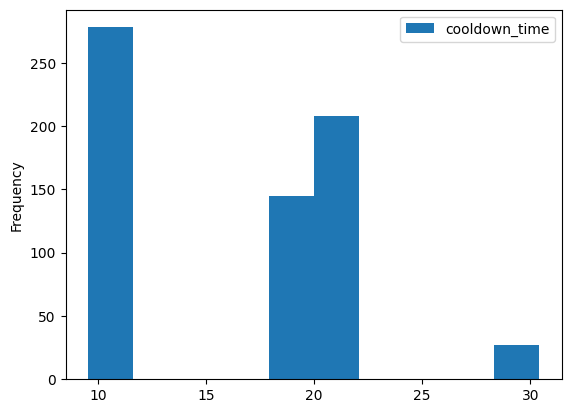

In [75]:
df.plot.hist(column="cooldown_time")
plt.show()

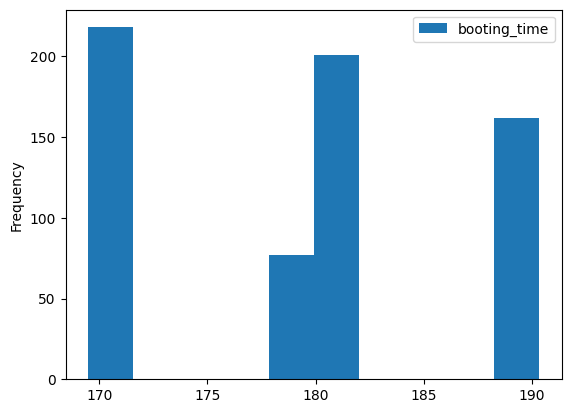

In [76]:
df.plot.hist(column="booting_time")
plt.show()

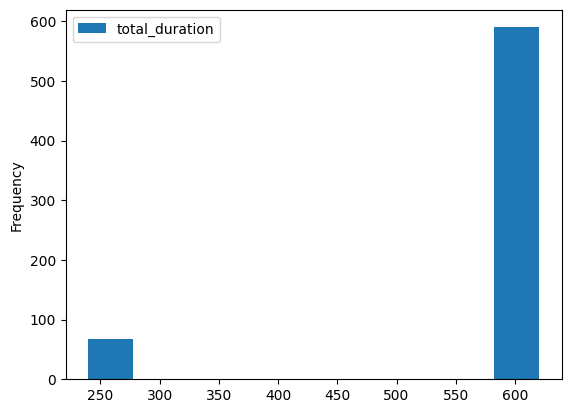

In [77]:
df.plot.hist(column="total_duration")
plt.show()

In [78]:
df.columns

Index(['id', 'boot_start_dt', 'booting_time', 'active_time', 'cooldown_time',
       'total_duration', 'window_end_dt'],
      dtype='object')

In [79]:
full_df=pd.DataFrame.from_dict(lista)

In [80]:
full_df.columns

Index(['id', 'boot_start_dt', 'booting_time', 'active_time', 'cooldown_time',
       'total_duration', 'window_end_dt'],
      dtype='object')

In [81]:
#uptime_df["timestamp"]=uptime_df['obc_received_timestamp'].apply(lambda x: (datetime.fromtimestamp(x/1000.0,timezone.utc)))


In [82]:
full_df['middle_date'] = full_df['boot_start_dt'] + (full_df['window_end_dt'] - full_df['boot_start_dt']) / 2

In [83]:
full_df.to_pickle("full_data_frame")